                                                            DA-1



                                                   ## NAME - Mitali Chauhan
                                                   ## REG. NO. - 18BCE7178
                                                     (PART-2 and PART-3)

### Importing libraries and packages

In [86]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# 11. Repeated steps from 1 to 7:
### 1. Create a dataset with the content of the file
### 2. Drop columns titled Name, SMILES and KOW type

In [87]:
#importing dataset and dropping columns named Name,SMILES, KOW type

dataset=pd.read_csv('Documents\QSAR_BCF_Kow.csv')
DS=dataset.drop(columns=['Name','SMILES','KOW type'])
DS


,CAS,LogKOW,logBCF
0,105-67-9,2.30,1.18
1,108-39-4,1.96,1.03
2,113136-77-9,1.98,-0.40
3,114311-32-9,1.02,-1.00
4,1689-84-5,2.99,0.84
...,...,...,...
1049,V-Mey_NA_04,6.46,3.71
1050,V-Mey_NA_05,6.51,3.92
1051,V-Mey_NA_06,8.21,3.76
1052,V-Mey_NA_07,9.14,3.19


### 3. Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA in the column titled “CAS”.

In [88]:
#Updating LogKOW values based on CAS values('V_MEY_NA')
c=0
for i in DS['CAS']:
    c+=1
    if i[0:8]== 'V-Mey_NA':
        DS['LogKOW'][c] = np.NaN
DS

C:\Users\robin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CAS,LogKOW,logBCF
0,105-67-9,2.30,1.18
1,108-39-4,1.96,1.03
2,113136-77-9,1.98,-0.40
3,114311-32-9,1.02,-1.00
4,1689-84-5,2.99,0.84
...,...,...,...
1049,V-Mey_NA_04,NaN,3.71
1050,V-Mey_NA_05,NaN,3.92
1051,V-Mey_NA_06,NaN,3.76
1052,V-Mey_NA_07,NaN,3.19


### 4. Check for missing values. If available, fill it with zeros, ones and mean of column.
### 5. Remove the column titled “CAS”.

In [89]:
#fitting mean values into NaN values
x=DS['LogKOW'].mean()
DS=DS.fillna(value=x)
DS=DS.drop(columns=['CAS'])
DS

,LogKOW,logBCF
0,2.300000,1.18
1,1.960000,1.03
2,1.980000,-0.40
3,1.020000,-1.00
4,2.990000,0.84
...,...,...
1049,3.839312,3.71
1050,3.839312,3.92
1051,3.839312,3.76
1052,3.839312,3.19


### 6. Normalize the values using min-max normalization.

In [90]:
#max min normalization of two data columns
DS['LogKOW']=((DS['LogKOW']-DS['LogKOW'].min())/(DS['LogKOW'].max()-DS['LogKOW'].min()))
DS['logBCF']=((DS['logBCF']-DS['logBCF'].min())/(DS['logBCF'].max()-DS['logBCF'].min()))

### 7. Perform linearity analysis on the resultant dataset.

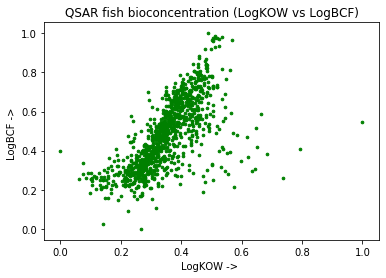

In [91]:
# Scatter Plot
plt.scatter(DS['LogKOW'],DS['logBCF'],s=7,c='g',marker='o')
plt.title("QSAR fish bioconcentration (LogKOW vs LogBCF)")
plt.xlabel("LogKOW -> ")
plt.ylabel("LogBCF -> ")

plt.show()

,LogKOW,logBCF
LogKOW,1.000000,0.664487
logBCF,0.664487,1.000000


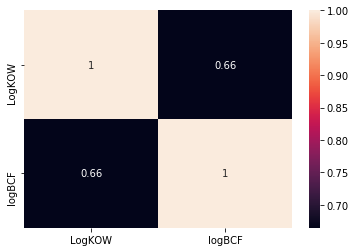

In [92]:
import seaborn as sb
data_corr = DS.corr()
sb.heatmap(data_corr,annot=True)
data_corr


### 12. Divide the dataset into having 750 and 308 rows. 

### 13. Store the data for 750 rows in train_x and train_y lists. & 14. Store the data for 308 rows in test_x and actual_y.

In [93]:
from sklearn import linear_model
regress = linear_model.LinearRegression()

DS1=DS.iloc[:750,:]
DS2=DS.iloc[750:,:]

train_x = np.asanyarray(DS1[['LogKOW']])
train_y = np.asanyarray(DS1[['logBCF']])

test_x=np.asanyarray(DS2[['LogKOW']])
actual_y=np.asanyarray(DS2[['logBCF']])

regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.1325953]]
Intercept:  [0.08748707]


### 15. Predict the value of y, dependent value using the calculated m and c values and store in predicted_y.
### 16. Compare the difference between actual_y and predicted_y.


In [117]:
y_predicted = regress.predict(test_x)
for i in range(0,len(train_x)):
    print(actual_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted


[0.65206186] [0.52126854]
[0.52319588] [0.45843103]
[0.48195876] [0.46856611]
[0.29896907] [0.63782197]
[0.69587629] [0.55015352]
[0.5193299] [0.45184323]
[0.62371134] [0.50251864]
[0.45618557] [0.57802499]
[0.57860825] [0.53900493]
[0.56185567] [0.56890342]
[0.52190722] [0.53444414]
[0.21907216] [0.29525623]
[0.47293814] [0.51569424]
[0.43170103] [0.47768769]
[0.70618557] [0.52126854]
[0.30798969] [0.52228204]
[0.30025773] [0.50049162]
[0.24613402] [0.31806016]
[0.61597938] [0.6363017]
[0.6507732] [0.61552479]
[0.50257732] [0.59525463]
[0.73324742] [0.61147076]
[0.80412371] [0.59474787]
[0.66365979] [0.6915379]
[0.60953608] [0.54001844]
[0.34278351] [0.39001924]
[0.26417526] [0.22177689]
[0.53092784] [0.49998487]
[0.55283505] [0.49795785]
[0.69845361] [0.63782197]
[0.14819588] [0.3043778]
[0.64304124] [0.63984898]
[0.20489691] [0.23900653]
[0.56701031] [0.59170735]
[0.6378866] [0.5734642]
[0.56829897] [0.50809293]
[0.69458763] [0.52734958]
[0.44974227] [0.35758698]
[0.32989691] [0.401

IndexError: index 304 is out of bounds for axis 0 with size 304

### 17. Calculate MAE, MSE and r2. 

In [120]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(actual_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(actual_y, y_predicted))
print("R2-score:" , r2_score(actual_y, y_predicted) )

Mean Absolute Error: 0.08572533990816072
Mean Squared Error: 0.012476627710948237
R2-score: 0.470395246377073


### What do you infer from the scores?
##### Ans. We infer that the MAE value and MSE value is quite acceptable, the R-squared value is moderately good but attention should be given to the fact that it is not necessary that a model with higher R-squared value would perform always better than a model with a lower R-squared value. ~50 is quite a good fit for our simple model. 

### 18. Perform cross – validation with 2, 3, 4 and till 14 folds with r2 as the metric

In [141]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, DS[['LogKOW']], DS[['logBCF']], cv = 2,scoring='r2')
x0=accuracy.mean()
print(x0)

0.40108660871099056


In [130]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, DS[['LogKOW']], DS[['logBCF']], cv = 3,scoring='r2')
x1=accuracy.mean()
print(x1)

0.39393355502389227


In [151]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, DS[['LogKOW']], DS[['logBCF']], cv = 4,scoring='r2')
x2=accuracy.mean()
print(x2)

0.35577178930235664


In [162]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regress, DS[['LogKOW']], DS[['logBCF']], cv = 14,scoring='r2')
x3=accuracy.mean()
print(x3)

0.3614300932595036


### 19. Perform thorough analysis on this.
#### Ans. The basic idea is that lower K is usually cheaper and more biased. Larger K is more expensive (unless you can cleverly build it into your fitting process), less biased, but can suffer from large variability. This is often cited with the conclusion to use k=10. Specifically in our case, the more the value of cv (K) we keep the mean value of all the validations reduces. 

####  K-fold cross validation is about estimating the accuracy, not impoving the accuracy. Most implementations of k fold CV give us an estimate of how accurately they are measuring our accuracy.

### 20. Graph to show the relationship between "folds" and "estimation of accuracy"

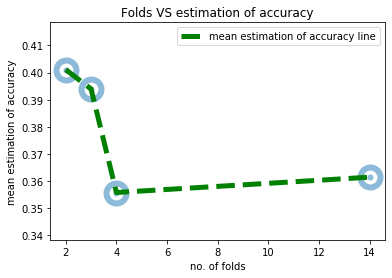

In [30]:

X=[x0,x1,x2,x3]
K=[2,3,4,14]

plt.scatter(K,X,alpha=0.5,linewidth=20)
plt.plot(K,X,linestyle='dashed',color='green',linewidth=5)
plt.xlabel("no. of folds")
plt.ylabel("mean estimation of accuracy")
plt.title("Folds VS estimation of accuracy")
plt.legend(['mean estimation of accuracy line'])
plt.show()
